# Title

## Objectives: 
1. Choose a real-world phenomenon that can be measured.
2. Investigate the types of variables involved, their likely distributions, and their
relationships with each other, accross at least 4 variables.
3. Synthesise/simulate a data set as closely matching their properties as possible.


<br>

## Real World Phenomenon
***

### Hypertension
This project will explore *hypertension*, which is more commonly known as high blood pressure. This real world problem can result in stroke, heart<br>
disease and heart attacks. Blood pressure is measured using systolic blood pressure which measures the pressure in ones arteries when their heart<br>
beats, and diastolic blood pressure which measures the pressure in ones artetries between heart beats [1]. The Centers for Disease Control and<br>
Prevention defines hypertension as a systolic reading of ≥ 130 mmHg and/or a diastolic reading of ≥ 80 mmHg.



<br>

## Investigating the Variables
***
### Selection:
Justin et al.(2013) detail how 467 abstracts related to hypertension were closely examined and how 11 articles of 467 were indentified that explored<br>
linear regression prediction models with incident hypertension as their outcome of interest. The results of these articles showed suggested that the<br>
best predictor variables were age, sex, body mass index, diabetes status, parental hypertension, smoking and systolic/diastolic blood pressure. 

The following variables will be selected to model a predictive hypertension dataset.<br>
- Continuous:<br>
    - BMI [kg/m²]
    - Systolic Blood Pressure (BPd) [mmHg] 
    - Diastolic Blood Pressure (BPs) [mmHg]<br> <br>

- Discrete:
    - Age
- Categorical:
    - Sex 
    - Parental hypertension 
    

<table style = 'float : left;'>
<tr><th>Variable Summary</th>
<tr><td>

|Variable Type| Variable |Units|
|--|--|--|
|Continuous|BMI|[kg/m²]|
|Continuous|Systolic Blood Pressure (BPd) |[mmHg]|
|Continuous|Diastolic Blood Pressure (BPs)|[mmHg]|
|Discrete|Age|Years|
|Categorical|Sex | |
|Categorical|Parental hypertension | |

</td></tr> </table>

### Distribution:

### Correlation:

In [ ]:
Importance of drawing samples from distribution, as mean and std dev alone can not determine an accurate distribution
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet

# parental hypertension

In [2]:
# link to paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3728227/
# # Normality of variables distribution was checked and found satisfactorily


# what variables are important for each variables .... how are they related?....

In [ ]:
 - Continuous:
    - Systolic Blood Pressure (BPs) [mmHg]
    - Diastolic Blood Pressure (BPd) [mmHg] 
    - BMI [kg/m²]<br><br>
    
- Discrete:
    - Body Fat [%]
    - Age [Years]

<table style = 'float : left;'>
<tr><th>Male Statistics </th><th>Female Statistics</th></tr>
<tr><td>

|Variable| Mean | Std Dev|
|--|--|--|
|BPs [mmHg]|133.1| 17.0|
|BPd [mmHg]|82.5 | 11.6|
|Age [years]|46.1|16.6|
|Body Fat [%]|23.2|7.0 |
|BMI [kg/m²]|26.8|3.9|

</td><td>

| Mean | Std Dev|
|--|--|
|127.7| 17.5|
|78.5 | 10.6|
|45.4|15.4|
|29.4|8.3|
|24.8|4.6|

</td></tr> </table>

## Simulating The Dataset

In [2]:
import matplotlib.pyplot as plt             # for plotting
import numpy as np                          # for numeric processing (from different distributions)
import pandas as pd                         # to generate dataframes & manipulat data

plt.rcParams['font.size'] = 13              # set default plot font size 
plt.rcParams["figure.figsize"] = (10, 6)    # set default figure font size 

In [3]:
def generate_multivariate_normal(means, std_devs, corr_coeff, num_samples):
    '''This fuction returns a multivariate normal array'''
    # Construct new Generator using default BitGenerator(PCG64) and store in rng variable
    rng = np.random.default_rng(100)
    
    variances = np.square(std_devs) 
    covariance = corr_coeff * (std_devs[0] * std_devs[1]) 
    covariance_matrix = [[variances[0], covariance], [covariance, variances[1]]]  
    array = rng.multivariate_normal(means, covariance_matrix, num_samples)
    return array

In [ ]:
def test(means, std_devs, corr_coeff, num_samples):
    '''This fuction returns a multivariate normal array'''
    # Construct new Generator using default BitGenerator(PCG64) and store in rng variable
    rng = np.random.default_rng(100)
    
    variances = np.square(std_devs) 
    covariance = corr_coeff * (std_devs[0] * std_devs[1]) 
    covariance_matrix = [[variances[0], covariance], [covariance, variances[1]]]  
    array = rng.multivariate_normal(means, covariance_matrix, num_samples)
    return array

In [4]:
# male array formation
# element order: BPs, BPd, Age, fat%, BMI
means = {'Male' :[133.1, 82.5, 46.1, 23.2, 26.8], 'Female': [127.7, 78.5, 45.4, 29.4, 24.8]}  
std_devs = {'Male' :[17.0, 11.6, 16.6, 7.0, 3.9], 'Female': [17.5, 10.6, 15.4, 8.3, 4.6]}  


corr_coeff = 0.5
num_samples = 120

male_weight_vs_fat = generate_multivariate_normal(means, std_devs, corr_coeff, num_samples)
male_gender = np.repeat('Male', num_samples)

In [5]:
# female weight and fat percentage stats
means = (67.3, 29.4)   # element 1: weight, element 2: fat%
std_devs = (12.8, 8.3) # element 1: weight, element 2: fat%
corr_coeff = 0.73
num_samples = 276

female_weight_vs_fat = generate_multivariate_normal(means, std_devs, corr_coeff, num_samples)
female_gender = np.repeat('Female', num_samples)

In [6]:
df_male = pd.DataFrame({'Weight' : male_weight_vs_fat[:,0], 'Percent Fat' : male_weight_vs_fat[:,1],'Gender' : male_gender})
print(df_male .corr())

df_female = pd.DataFrame({'Weight' : female_weight_vs_fat[:,0], 'Percent Fat' : female_weight_vs_fat[:,1],'Gender' : female_gender})
print(df_female.corr())

               Weight  Percent Fat
Weight       1.000000     0.547184
Percent Fat  0.547184     1.000000
               Weight  Percent Fat
Weight       1.000000     0.723947
Percent Fat  0.723947     1.000000


In [7]:
##combine dfs
#female_gender = np.repeat('Female', 3)
#gender_col = np.concatenate((male_gender, female_gender), axis = 0)
#weight_col = np.concatenate((male_height, female_height), axis = 0)

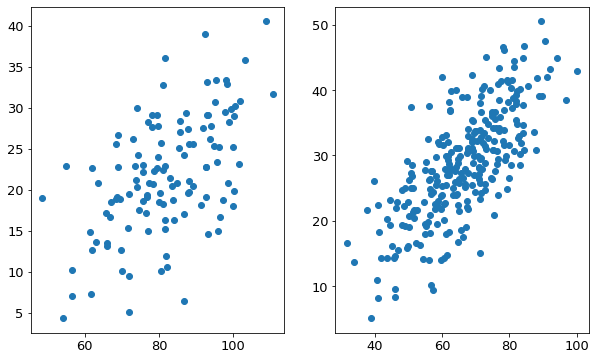

In [11]:
#plt.scatter(df['Weight'], df['Percent Fat'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
ax1.scatter(male_weight_vs_fat[:,0],  male_weight_vs_fat[:,1])
ax2.scatter(female_weight_vs_fat[:,0],  female_weight_vs_fat[:,1])

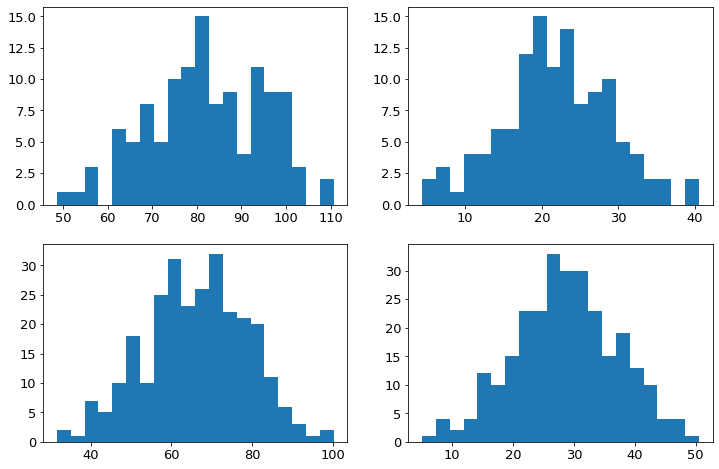

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8))

ax[0, 0].hist(df_male['Weight'], bins = 20);
ax[0, 1].hist(df_male['Percent Fat'], bins = 20);
ax[1, 0].hist(df_female['Weight'], bins = 20);
ax[1, 1].hist(df_female['Percent Fat'], bins = 20);

In [11]:
'''
Table 1
Basic sample characteristics – men.

Variable	Count	Mean	Standard deviation
BMI	120	26.8	3.9
Weight [kg]	120	84.4	13.2
Fat percentage	120	23.3	7.0
Age [years]	120	46.1	16.6
Height [cm]	120	176.9	7.6
BPs [mmHg]	120	133.1	17.0
BPd [mmHg]	120	82.5	11.6
BMI – Body Mass Index [kg/m2]; Fat percentage – percentage of total body fat [%]; BPs – systolic blood pressure; BPd – diastolic blood pressure.
''';

In [10]:
'''
Table 1
Basic sample characteristics – men.

Variable	Count	Mean	Standard deviation
BMI	120	26.8	3.9
Weight [kg]	120	84.4	13.2
Fat percentage	120	23.3	7.0
Age [years]	120	46.1	16.6
Height [cm]	120	176.9	7.6
BPs [mmHg]	120	133.1	17.0
BPd [mmHg]	120	82.5	11.6
BMI – Body Mass Index [kg/m2]; Fat percentage – percentage of total body fat [%]; BPs – systolic blood pressure; BPd – diastolic blood pressure.
''';

## References
[X] CDC, 2021, High Blood Pressure Symptoms and Causes, Available at:<br>
[Ref X](https://www.cdc.gov/bloodpressure/about.htm) (Accessed 08 December 2021).<br>

<br>

[X]. Singh, S, 2019, Getting the Basics of Correlation & Covariance, Available at:<br>
[Ref X](https://towardsdatascience.com/getting-the-basics-of-correlation-covariance-c8fc110b90b4) (Accessed 07 December 2021).


<br>

Justin, B, et al. (2013), Risk Models to Predict Hypertension: A Systematic Review, Plos One, Availabile at:<br>
[Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3702558/) (Accessed 08 December 2021).

<br>



<br>



<br>



<br>



<br>



<br>



<br>



<br>



<br>



<br>
